 **Mielage Prediction**

-------------

## **Import Library**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

## **Import Data**

In [3]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Describe Data**

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Data Visualization**

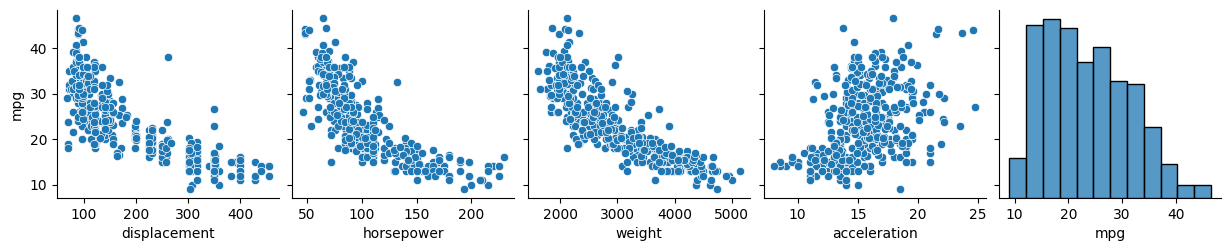

In [11]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

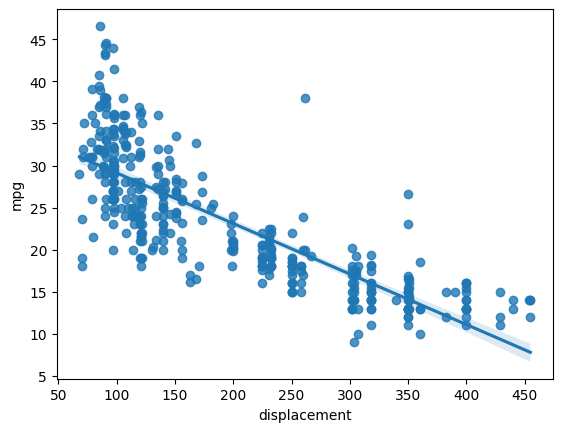

In [12]:
sns.regplot(x='displacement',y='mpg',data=df);

## **Data Preprocessing**

## **Define Target Variable (y) and Feature Variables (X)**

In [13]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [22]:
Y=df['mpg']

In [15]:
x=df[['displacement','horsepower','weight','acceleration']]

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(x)


## **Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.7,random_state=2569)

## **Modeling**

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [25]:
lr.fit(X_train,Y_train)

LinearRegression()

## **Model Evaluation**

## **Prediction**

In [27]:
y_pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import *
mean_absolute_error(Y_test,y_pred)

3.3917624602295366

In [29]:
mean_absolute_percentage_error(Y_test,y_pred)

0.14730840999183642

In [30]:
r2_score(Y_test,y_pred)

0.6656821486666333

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [32]:
X_train2=poly.fit_transform(X_train)

In [33]:
X_test2=poly.fit_transform(X_test)

In [34]:
lr.fit(X_train2,Y_train)

LinearRegression()

In [35]:
y_pred2=lr.predict(X_test2)

In [36]:
from sklearn.metrics import *
mean_absolute_error(Y_test,y_pred2)

3.0594631012723585

In [37]:
mean_absolute_percentage_error(Y_test,y_pred2)

0.13044392875446162

In [39]:
r2_score(Y_test,y_pred2)

0.7145498204517291